<a href="https://colab.research.google.com/github/demirbilek95/NLP_Project/blob/main/src/guidedLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Guided LDA

In [2]:
!pip install git+https://github.com/CatalinVoss/GuidedLDA

  Cloning https://github.com/CatalinVoss/GuidedLDA to /tmp/pip-req-build-13_4ff0m
  Running command git clone -q https://github.com/CatalinVoss/GuidedLDA /tmp/pip-req-build-13_4ff0m
  Created wheel for guidedlda: filename=guidedlda-2.0.0.dev27-cp37-cp37m-linux_x86_64.whl size=2492623 sha256=366d0c9de3e1d129d711dcadbc87cd04d4c1c23770141075c1e389f2ab221ad2
  Stored in directory: /tmp/pip-ephem-wheel-cache-2w89_q8i/wheels/a4/d5/1c/a4bf220c10fc39992c8af75ee87dc0cdd2c332bf6923b4c5eb
Successfully built guidedlda


In [3]:
import numpy as np
import pandas as pd
import guidedlda
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [4]:
df = pd.read_excel("clean_train.xlsx")
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text,onehot_encoded,topic,label_encoded,clean_text
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps P...,"[1, 0, 0, 0, 0, 0]",Computer Science,0,reconstruct subject specific effect map predic...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation i...,"[1, 0, 0, 0, 0, 0]",Computer Science,0,rotation invariance neuralnetwork rotation inv...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,"[0, 0, 1, 0, 0, 0]",Mathematics,11,spherical polyharmonic poisson kernel polyharm...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,A finite element approximation for the stochas...,"[0, 0, 1, 0, 0, 0]",Mathematics,11,finite element approximation stochastic maxwel...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,"[1, 0, 0, 1, 0, 0]",Computer Science & Statistics,8,comparative discrete wavelet transform wavelet...


In [5]:


# vectorize input
vectorizer = CountVectorizer(analyzer='word', 
                             ngram_range=(1,2), 
                             min_df=30, 
                             max_df=0.3, 
                             stop_words='english')

X = vectorizer.fit_transform(df.clean_text.tolist())

# store lookup structures for convenience
vocab = vectorizer.get_feature_names()
word2id = dict((v, idx) for idx, v in enumerate(vocab))

print(X.shape)

(20972, 6014)


In [6]:
# define topic seeds based on intuition
indicators = {
    'LDA_Computer_Science': ["robot", "complexity", "algorithm","code","graph","query", "language" ,"user"],
    'LDA_Physics': ["spin", "material", "physics", "electron", "galaxy","star","optical","temperature"], 
    'LDA_Mathematics': ["prove", "asymtotic", "theorem", "equation", "algebra","mathematics","theory"],
    'LDA_Statistics': ["statistical", "learning", "estimator", "sample", "bayesian","regression","distribution","inference","statistics"],
    'LDA_Biology': ["brain", "gene", 'biological', "protein", "dna","cell","drug","population","food","human"],
    'LDA_Finance': ["market", "volatility", "financial", "stock","portfolio","price", "trading","economic","forecast","risk"]
}

topic_names, seed_topic_list = zip(*indicators.items())
# filter out all words not actually in vocab
seed_topic_list = [[w for w in words if w in set(vocab)] for words in seed_topic_list]
    
# create a mapping {word_id: k}, which we need for the model
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id
        
print(seed_topic_list)

[['robot', 'complexity', 'algorithm', 'code', 'graph', 'query', 'language', 'user'], ['spin', 'material', 'physics', 'electron', 'galaxy', 'star', 'optical', 'temperature'], ['prove', 'theorem', 'equation', 'algebra', 'mathematic', 'theory'], ['statistical', 'learning', 'estimator', 'sample', 'bayesian', 'regression', 'distribution', 'inference'], ['brain', 'gene', 'biological', 'protein', 'dna', 'cell', 'drug', 'population', 'human'], ['market', 'volatility', 'financial', 'stock', 'portfolio', 'price', 'trading', 'economic', 'forecast', 'risk']]


In [7]:
# define model
model = guidedlda.GuidedLDA(n_topics=len(seed_topic_list), 
                            n_iter=1000, 
                            random_state=7, 
                            refresh=50, 
                            alpha=0.5, 
                            eta=0.000001)

# fit the model with seeds
doc_topic = model.fit_transform(X, seed_topics=seed_topics, seed_confidence=10)

# retrieve the word descriptors
n_top_words = 6
topic_word = model.topic_word_
descriptors_guided = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: "{}"'.format(topic_names[i], '" "'.join(topic_words)))
    descriptors_guided.append(' '.join(topic_words[:2]))

INFO:guidedlda:n_documents: 20972
INFO:guidedlda:vocab_size: 6014
INFO:guidedlda:n_words: 1762957
INFO:guidedlda:n_topics: 6
INFO:guidedlda:n_iter: 1000
INFO:guidedlda:<0> log likelihood: -17339063
INFO:guidedlda:<50> log likelihood: -14029880
INFO:guidedlda:<100> log likelihood: -14000232
INFO:guidedlda:<150> log likelihood: -13989366
INFO:guidedlda:<200> log likelihood: -13985945
INFO:guidedlda:<250> log likelihood: -13979514
INFO:guidedlda:<300> log likelihood: -13976830
INFO:guidedlda:<350> log likelihood: -13977039
INFO:guidedlda:<400> log likelihood: -13972011
INFO:guidedlda:<450> log likelihood: -13969294
INFO:guidedlda:<500> log likelihood: -13967878
INFO:guidedlda:<550> log likelihood: -13967506
INFO:guidedlda:<600> log likelihood: -13964605
INFO:guidedlda:<650> log likelihood: -13964164
INFO:guidedlda:<700> log likelihood: -13960412
INFO:guidedlda:<750> log likelihood: -13962047
INFO:guidedlda:<800> log likelihood: -13958618
INFO:guidedlda:<850> log likelihood: -13958897
INFO

Topic LDA_Computer_Science: "algorithm" "graph" "time" "user" "number" "code"
Topic LDA_Physics: "field" "energy" "phase" "state" "high" "spin"
Topic LDA_Mathematics: "mathexpr" "mathexpr mathexpr" "theory" "equation" "function" "space"
Topic LDA_Statistics: "datum" "learning" "distribution" "sample" "function" "parameter"
Topic LDA_Biology: "learn" "image" "deep" "task" "neuralnetwork" "feature"
Topic LDA_Finance: "network" "time" "control" "datum" "dynamic" "analysis"


Guided LDA provides good results for the first 4 topics (Computer Science, Physics, Mathematics and Statistics). However for the last two topics (Quantitative Biology and Quantitative Finance), it doesn't perform well.It seems like for Quantitative Biology we have Deep Learning. It is most likely due to the having less data for those topics. Therefore LDA can not identify them very well.

In [8]:
lda_topics = [list(indicators.keys())[label] for label in np.argmax(model.doc_topic_,axis=1)] 
df["lda_topics"] = lda_topics

In [9]:
def getPercentages(df, topic):
    return round(df[df[topic] == 1].lda_topics.value_counts() / len(df[df[topic] == 1]) * 100,3)

In [10]:
for topic in df.columns[3:9]:
    print("\033[1m{}\033[0m".format(topic))
    print(getPercentages(df,topic))
    print("*"*30)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Computer Science
LDA_Biology             27.915
LDA_Finance             26.344
LDA_Computer_Science    22.213
LDA_Statistics          14.580
LDA_Mathematics          7.203
LDA_Physics              1.745
Name: lda_topics, dtype: float64
******************************
Physics
LDA_Physics             76.135
LDA_Finance              8.398
LDA_Mathematics          7.933
LDA_Statistics           2.910
LDA_Biology              2.362
LDA_Computer_Science     2.262
Name: lda_topics, dtype: float64
******************************
Mathematics
LDA_Mathematics         67.088
LDA_Statistics          16.287
LDA_Computer_Science     7.725
LDA_Finance              4.966
LDA_Physics              3.507
LDA_Biology              0.427
Name: lda_topics, dtype: float64
******************************
Statistics
LDA_Statistics          47.234
LDA_Biology             25.355
LDA_Computer_Science    11.352
LDA_Finance             11.352
LDA_Mathematics          3.784
LDA_Physics              0.922
Name: lda_topics

In [11]:
def plotPie(df, topic,ax):
    topics = (df[df[topic] == 1].lda_topics.value_counts() / len(df[df[topic] == 1]) * 100).index
    values = (df[df[topic] == 1].lda_topics.value_counts() / len(df[df[topic] == 1]) * 100).values
    ax.set_title(topic)
    ax.pie(values, labels = topics,autopct='%1.2f%%')

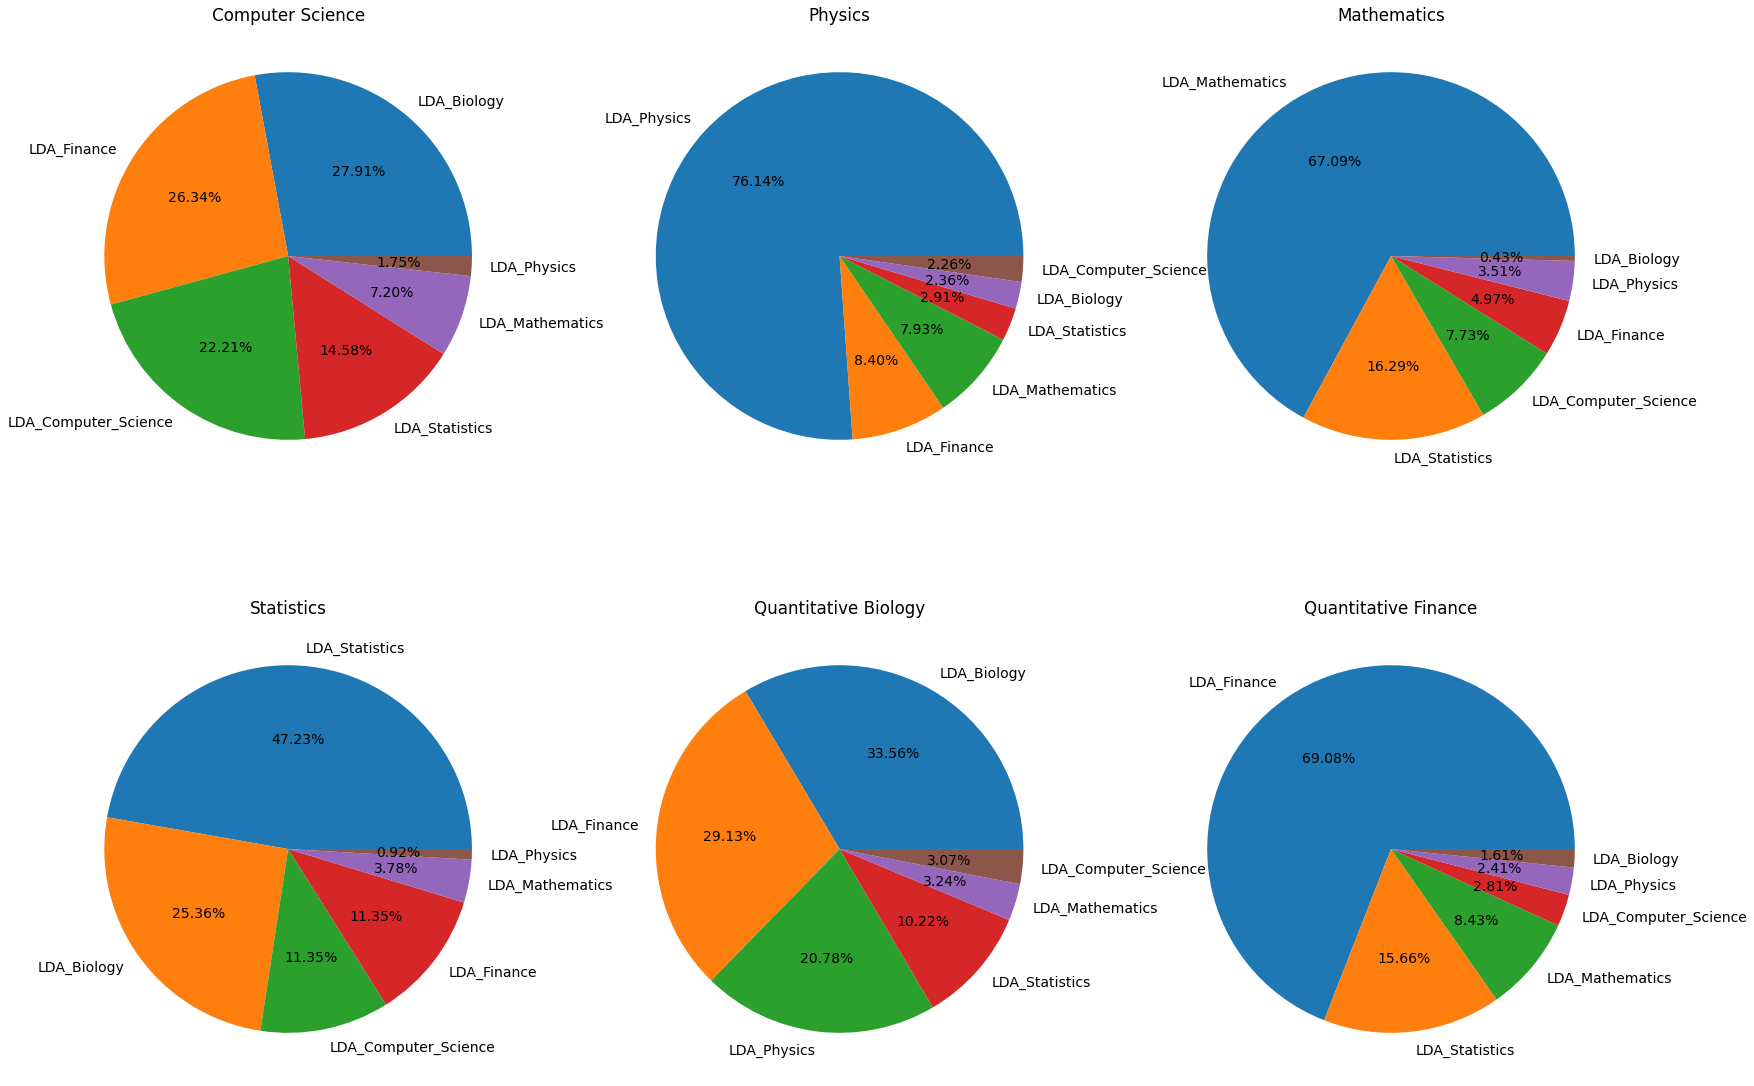

In [12]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(28,20))
for ax,topic in zip((ax1, ax2, ax3, ax4, ax5, ax6),df.columns[3:9]):
    plotPie(df,topic,ax)
    
plt.savefig("plots/ldaTopics.png")